In [1]:
# Import necessary modules for data analysis and data visualization. 
# Data analysis modules
import pandas as pd
import numpy as np

# Visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Machine learning libraries
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV


In [2]:
## Importing the training dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
## saving passenger id in advance in order to submit later. 
passengerid = test.PassengerId

In [5]:
## We will drop PassengerID and Ticket since it will be useless for our data. 
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

In [6]:
print (train.info())
print ("*"*40)
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float

In [7]:
# Dealing with Missing values
print (train.isnull().sum())
print (''.center(20, "*"))
print (test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
********************
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [8]:
# Embarked feature

print (train.Embarked.value_counts(dropna=False))
##print ((train.Embarked.value_counts(dropna=False)/len(train.Embarked)*100))
print (train.Embarked.value_counts(dropna=False, normalize=True)*100)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64
S      72.278339
C      18.855219
Q       8.641975
NaN     0.224467
Name: Embarked, dtype: float64


In [9]:
train[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
train.Embarked.fillna(train.Embarked.mode()[0], inplace=True)
train.Embarked.isnull().sum()

0

In [11]:
# Cabin feature

print(train.Cabin.isnull().sum()/len(train.Cabin))
print(test.Cabin.isnull().sum()/len(test.Cabin))


0.771043771044
0.782296650718


In [12]:
train.Cabin[train.Cabin.isnull()] = 'N'
test.Cabin[test.Cabin.isnull()] = 'N'


/Users/Anu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Anu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
train.Cabin = [i[0] for i in train.Cabin]
test.Cabin = [i[0] for i in test.Cabin]

In [14]:
print (train.isnull().sum())
print(''.center(15,'*'))
print(test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64
***************
Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Cabin        0
Embarked     0
dtype: int64


In [15]:
# Fare feature

test[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,N,S


In [16]:
test.Fare.fillna(test.Fare.mean(), inplace=True)

In [17]:
test.Fare.isnull().sum()

0

In [18]:
# Age feature

((train.Age.isnull().sum()/len(train))*100)

19.865319865319865

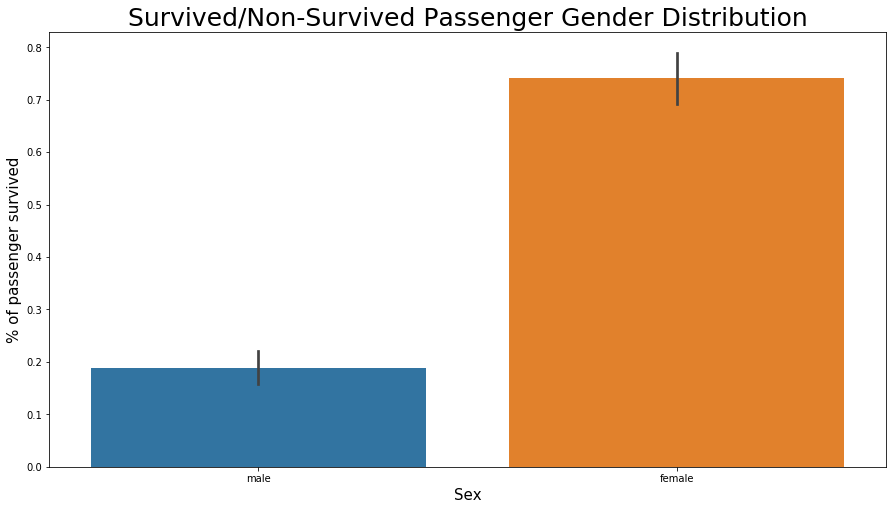

In [19]:
# Gender and survived

plt.subplots(figsize = (15,8))
sns.barplot(x = "Sex", y = "Survived", data=train,linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Sex",fontsize = 15)

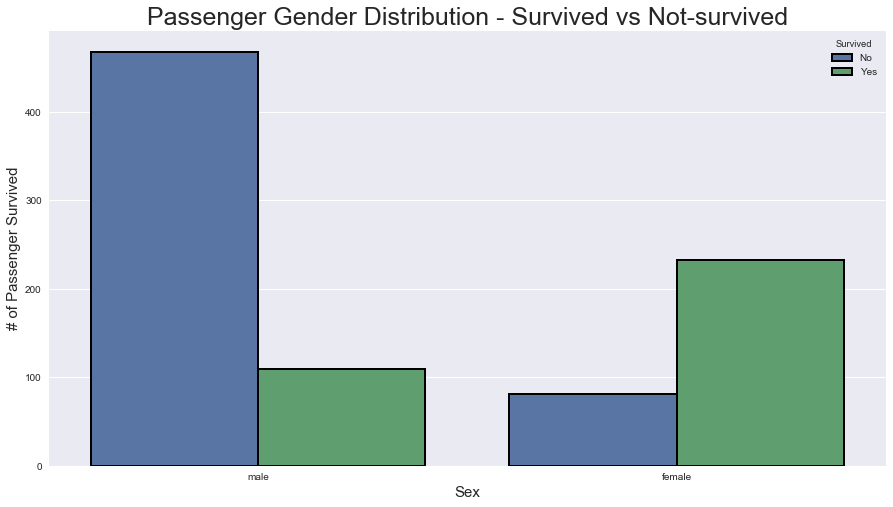

In [20]:
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train,
                   edgecolor=(0,0,0), 
                   linewidth=2)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

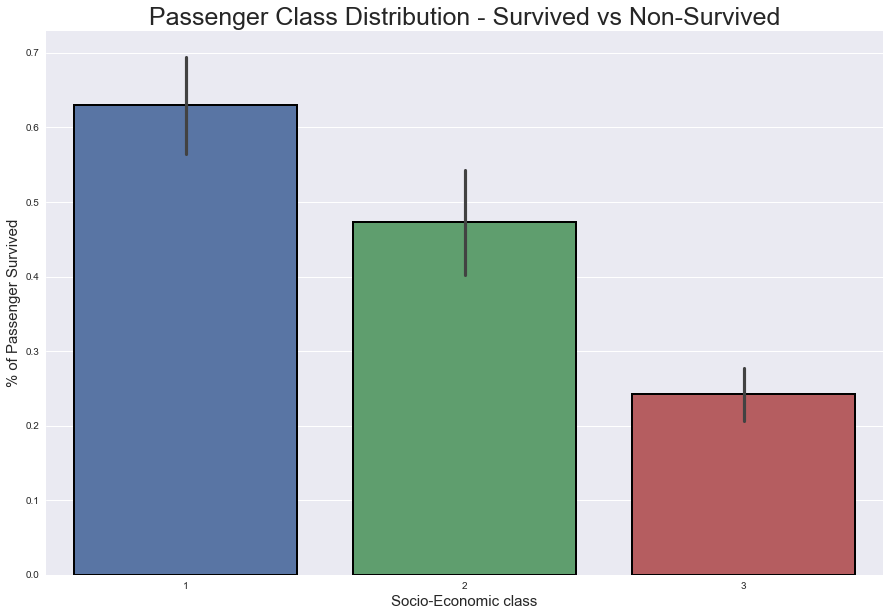

In [21]:
# PClass and Survived

plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", y = "Survived", data=train, edgecolor=(0,0,0), linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);

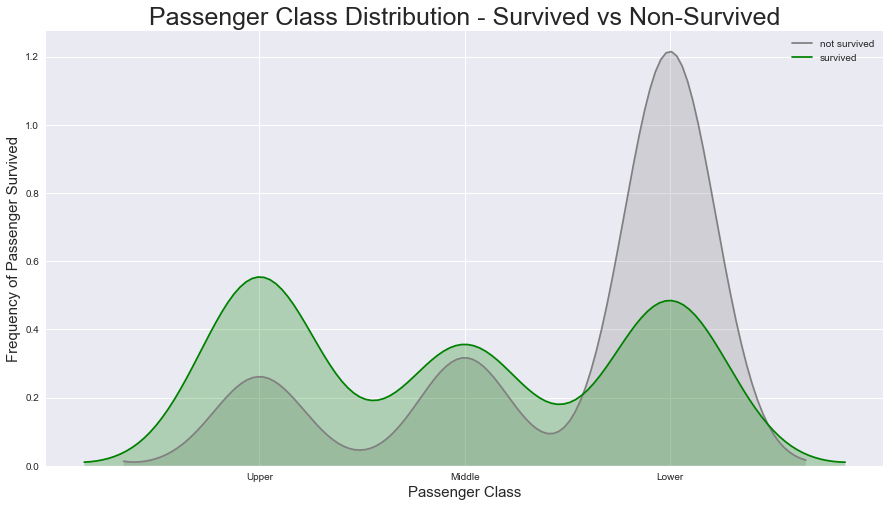

In [22]:
# Kernel Density Plot

fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , color='g',shade=True, label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

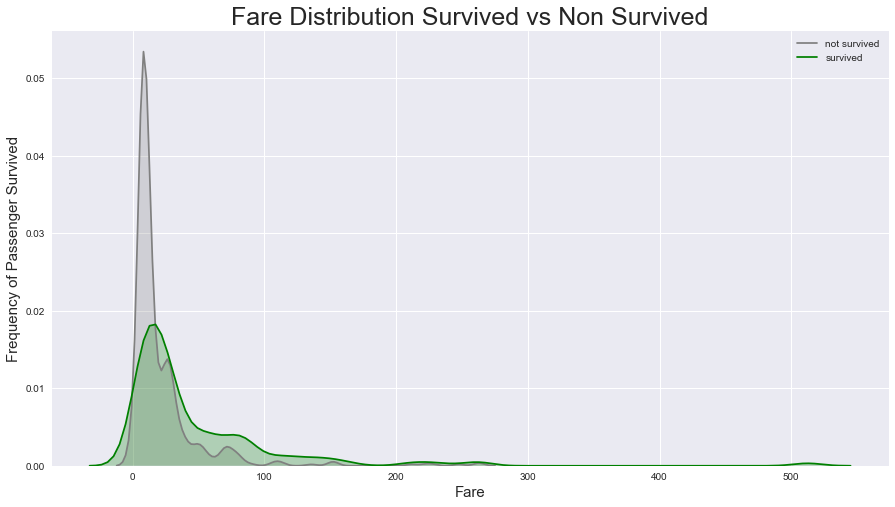

In [23]:
# Fare and survived

# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Fare", fontsize = 15)

/Users/Anu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/Anu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


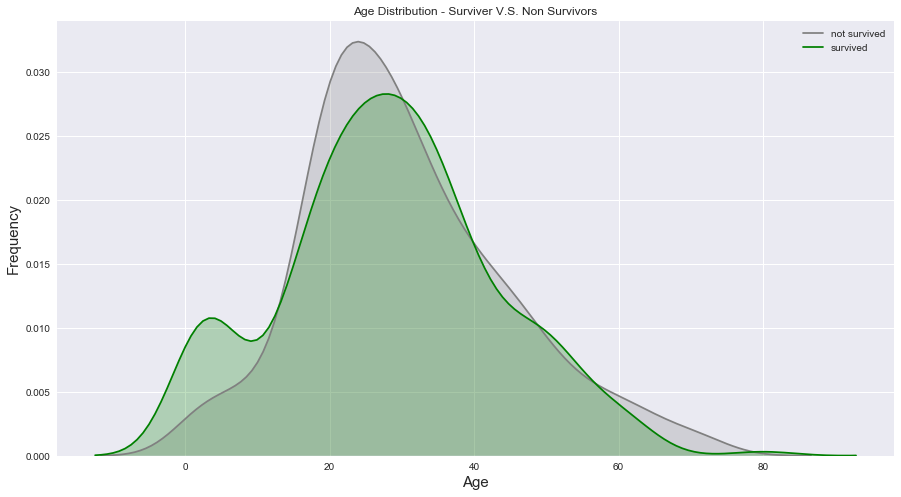

In [24]:
# Age and survived

# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors')
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);


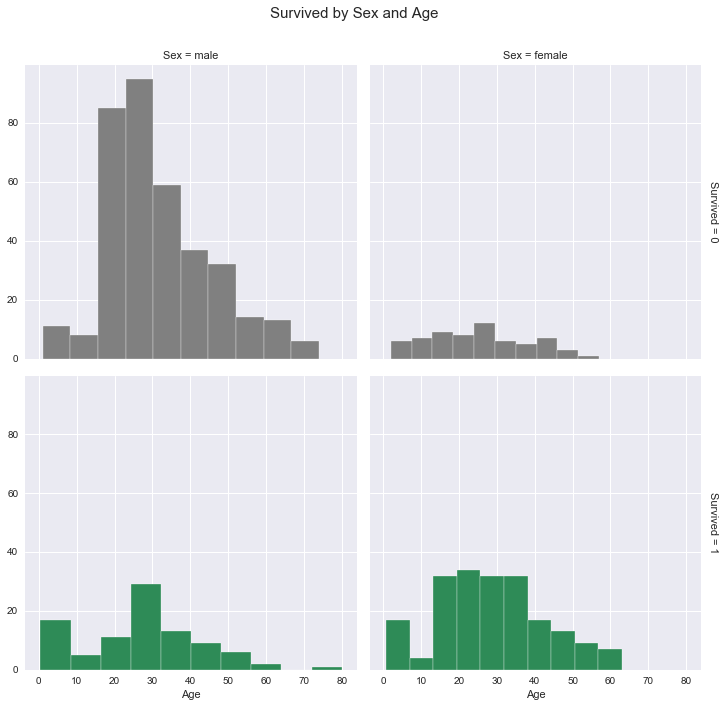

In [25]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 15)
plt.subplots_adjust(top=0.90)

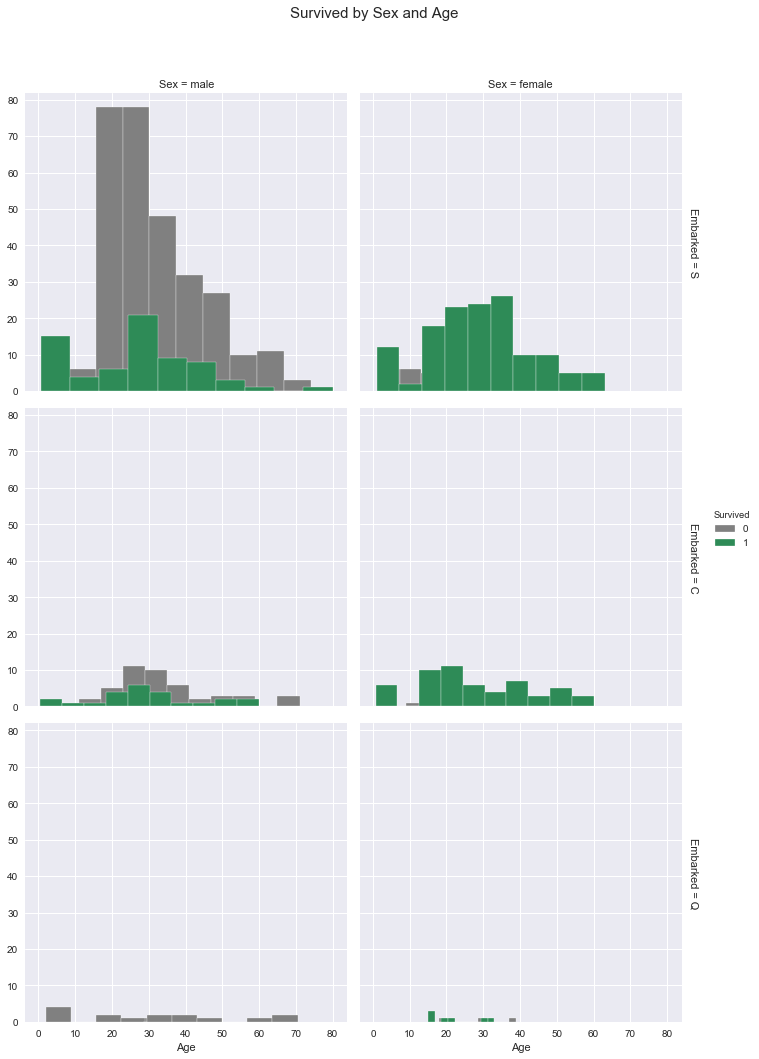

In [26]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 15)
plt.subplots_adjust(top=0.90)

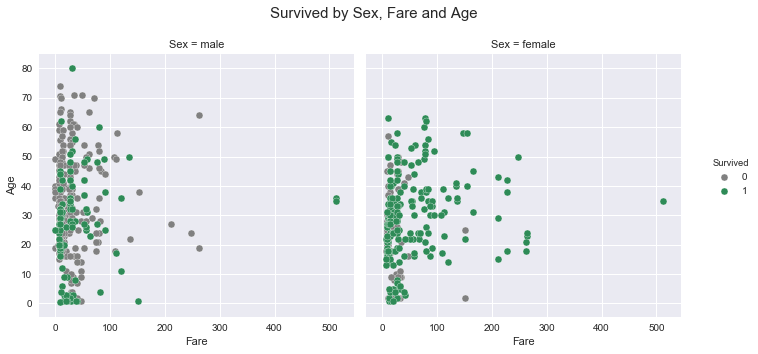

In [27]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 15)
plt.subplots_adjust(top=0.85)

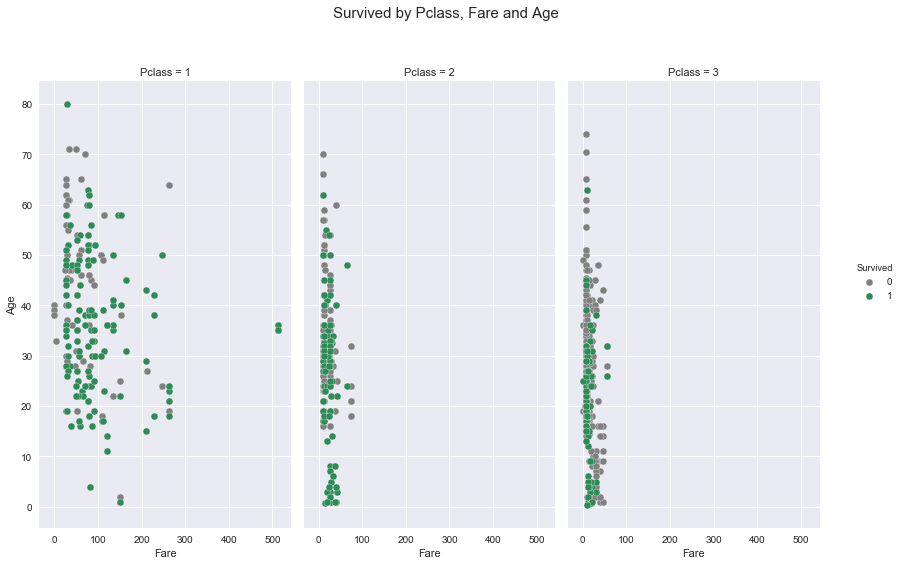

In [28]:
g = sns.FacetGrid(train, size=8, aspect=0.5, hue="Survived", 
                  col ="Pclass", margin_titles=True,
                palette=pal)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Pclass, Fare and Age", size = 15)
plt.subplots_adjust(top=0.85)

In [29]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


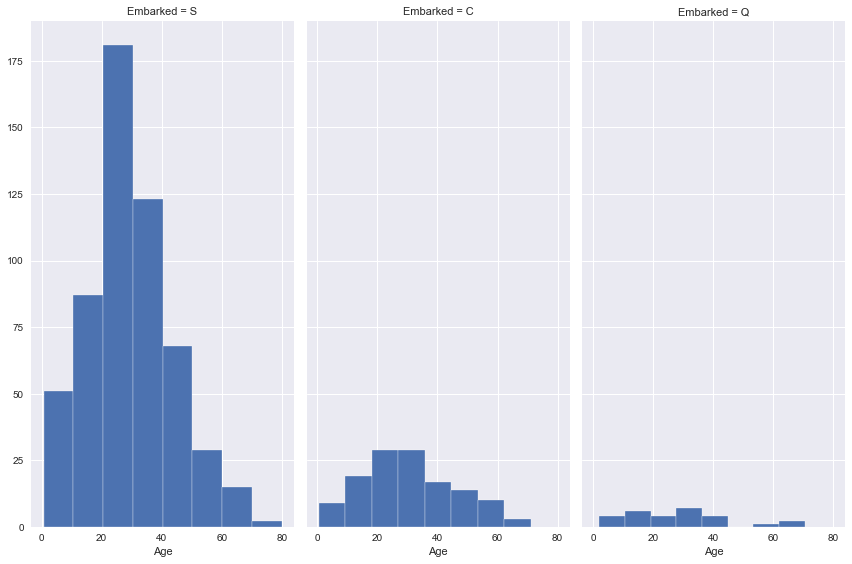

In [30]:
g = sns.FacetGrid(train, col="Embarked",size=8, aspect=.5)
g = g.map(plt.hist, "Age",edgecolor = 'white', bins=8)

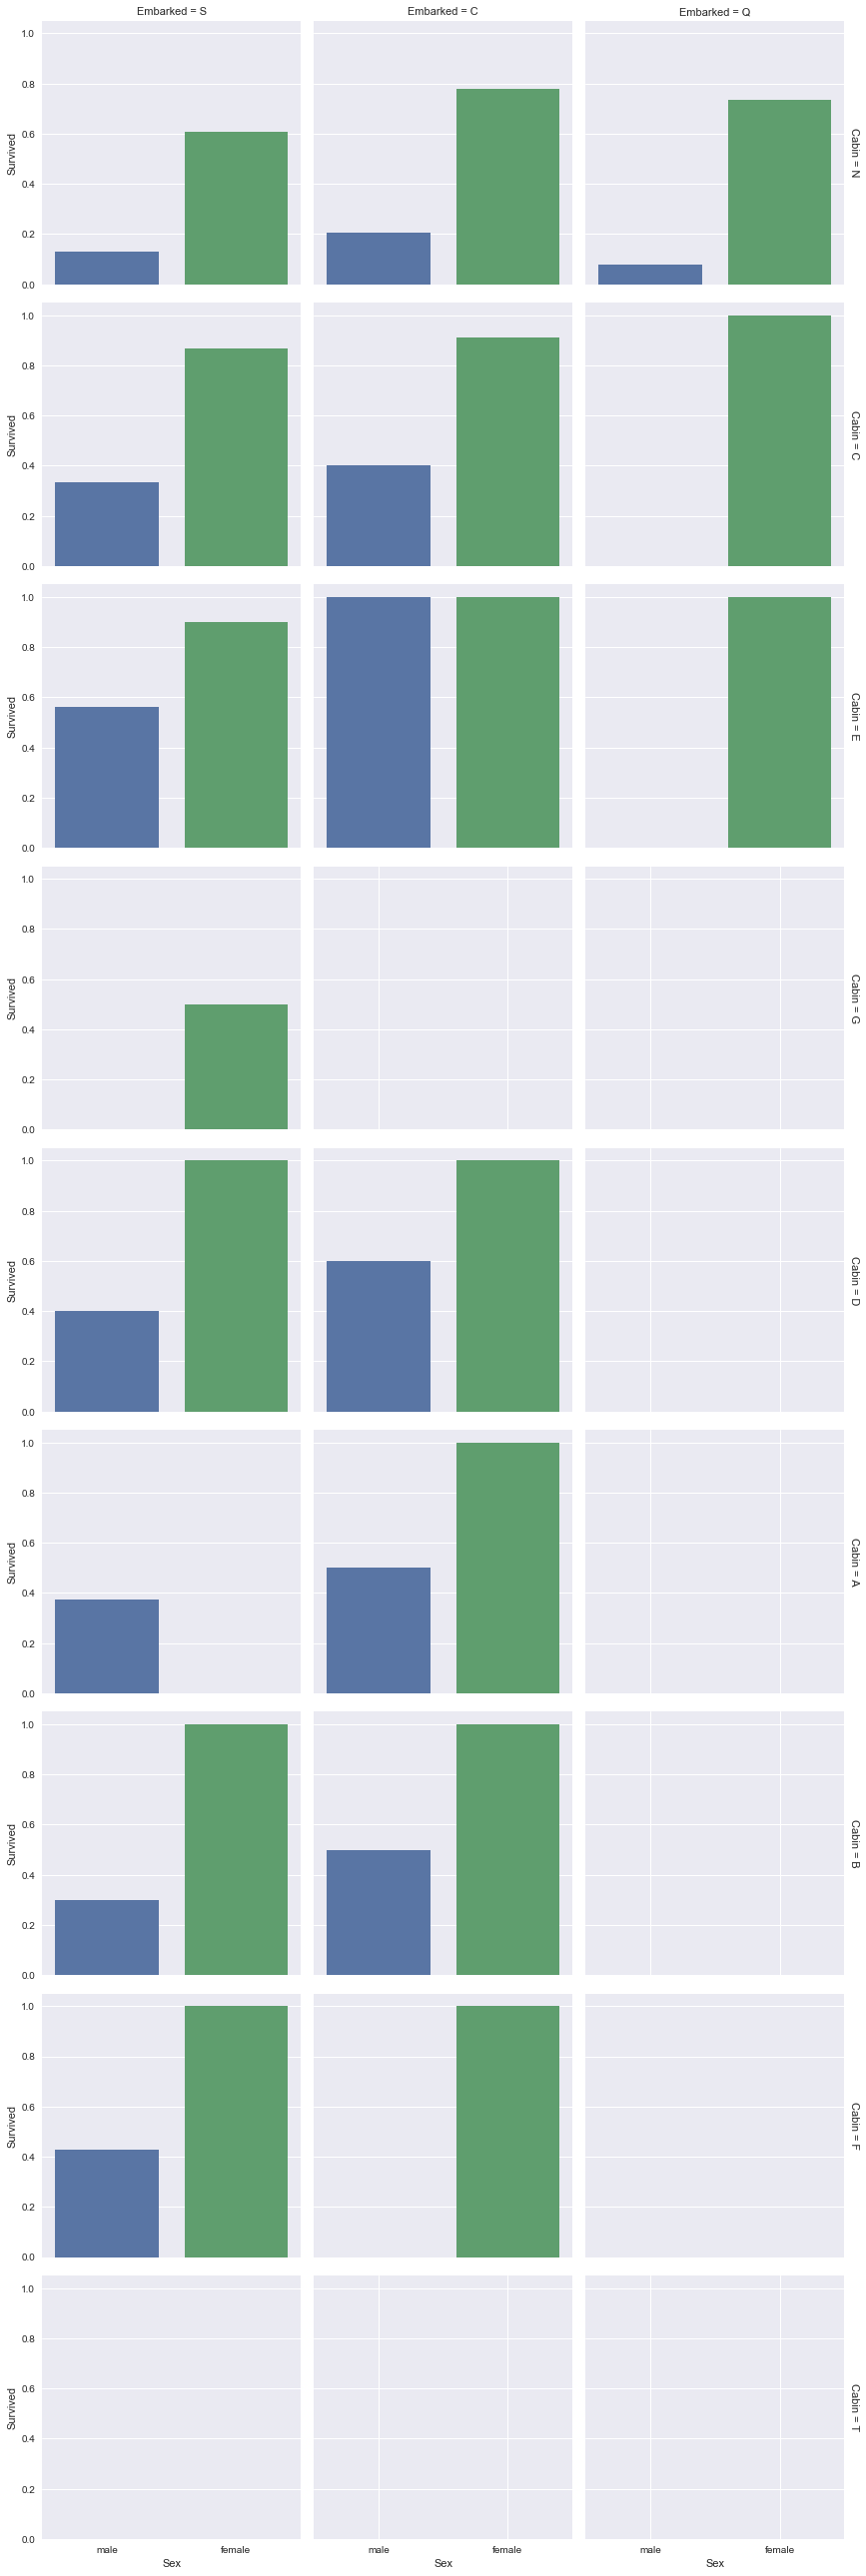

In [31]:
sns.factorplot(y = "Survived",
               x = "Sex",
               col = "Embarked",
               row = "Cabin",
              data = train, 
              kind = "bar",
              ci = None,
               margin_titles=True,
              size = 4)

In [32]:
## use label encoder to replace categorical values in Sex feature

from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
train.Sex = labelEncoder.fit_transform(train.Sex)
test.Sex = labelEncoder.fit_transform(test.Sex)

In [33]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N,S
5,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,N,Q
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E,S
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,N,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,N,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,N,C


In [34]:
# Exploratory Data Analysis

# Overview(Survived vs non survied)
survived_summary = train.groupby("Survived")
survived_summary.mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


In [35]:
survived_summary = train.groupby("Pclass")
survived_summary.mean()

,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,0.629630,0.564815,38.233441,0.416667,0.356481,84.154687
2,0.472826,0.586957,29.877630,0.402174,0.380435,20.662183
3,0.242363,0.706721,25.140620,0.615071,0.393075,13.675550


In [36]:
## Let's see the correlation between target variables and other features.
train.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [37]:
## get the most important variables 
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived    1.000000
Sex         0.295231
Pclass      0.114569
Fare        0.066207
Parch       0.006663
Age         0.005963
SibSp       0.001248
Name: Survived, dtype: float64

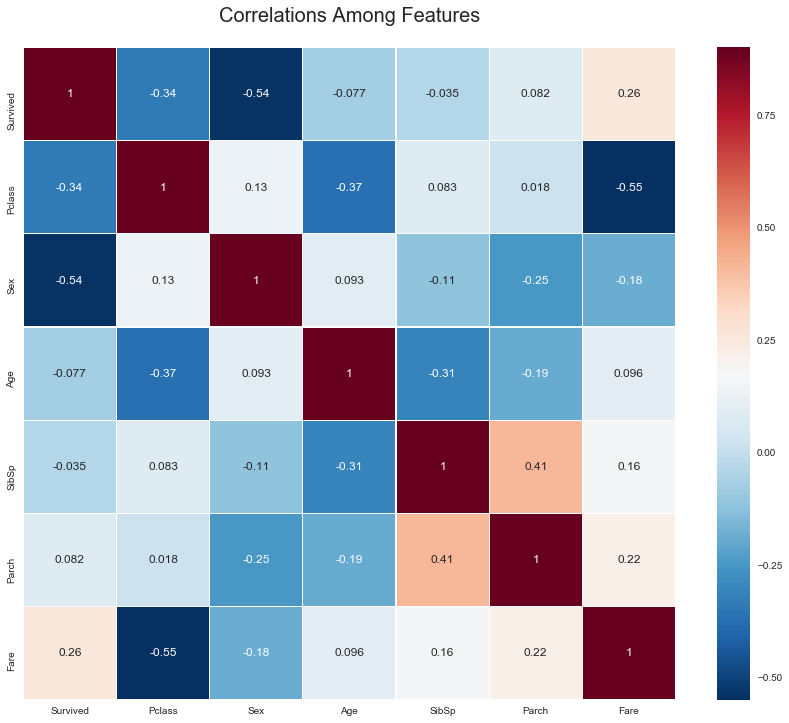

In [38]:
## heatmeap to see the correlation between features. 
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

In [39]:
# Feature Engineering

# name length
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]


In [40]:
def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a



In [41]:
train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

In [42]:
## get the title from the name
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
test["title"] = [i.split('.')[0] for i in test.Name]
test["title"]= [i.split(',')[1] for i in test.title]

In [43]:
train.title.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Jonkheer          1
 Ms                1
 Don               1
 Sir               1
 Capt              1
 Lady              1
 Mme               1
 the Countess      1
Name: title, dtype: int64

In [44]:
#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]

In [45]:
#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
test['title'] = [i.replace('Ms', 'Miss') for i in test.title]
test['title'] = [i.replace('Dr', 'rare') for i in test.title]
test['title'] = [i.replace('Col', 'rare') for i in test.title]
test['title'] = [i.replace('Dona', 'rare') for i in test.title]
test['title'] = [i.replace('Rev', 'rare') for i in test.title]

In [46]:
train["has_cabin"] = [0 if i == 'N'else 1 for i in train.Cabin]
test["has_cabin"] = [0 if i == 'N'else 1 for i in test.Cabin]

In [47]:
train.has_cabin.value_counts()


0    687
1    204
Name: has_cabin, dtype: int64

In [48]:
print (sorted(train.Cabin.unique()))
print (''.center(45,'*'))
print(sorted(test.Cabin.unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T']
*********************************************
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N']


In [49]:
## We are going to create a new feature "age" from the Age feature. 
train['child'] = [1 if i<16 else 0 for i in train.Age]
test['child'] = [1 if i<16 else 0 for i in test.Age]

In [50]:
train.child.value_counts()

0    808
1     83
Name: child, dtype: int64

In [51]:
## Family_size seems like a good feature to create
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

In [52]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [53]:
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

In [54]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

In [55]:
train.Ticket.value_counts().head(10)

1601            7
CA. 2343        7
347082          7
3101295         6
347088          6
CA 2144         6
S.O.C. 14879    5
382652          5
W./C. 6608      4
4133            4
Name: Ticket, dtype: int64

In [56]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length,nLength_group,title,has_cabin,child,family_size,family_group,is_alone
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,S,23,medium,Mr,0,0,2,small,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,51,long,Mrs,1,0,2,small,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N,S,22,medium,Miss,0,0,1,loner,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,44,good,Mrs,1,0,2,small,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N,S,24,medium,Mr,0,0,1,loner,1


In [57]:
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

In [58]:
train.calculated_fare.mean()

19.9163751119176

In [59]:
train.calculated_fare.mode()

0    13.0
dtype: float64

In [60]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

In [61]:
train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

In [62]:
# Create dummy variables

train = pd.get_dummies(train, columns=['title','Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=True)
test = pd.get_dummies(test, columns=['title','Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=True)
train.drop(['Cabin_T','calculated_fare', 'Ticket','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Ticket','Name','calculated_fare', "Fare",'name_length'], axis=1, inplace=True)

In [63]:
# Age feature

# importing missing values using KNN for age column. 
from fancyimpute import KNN
age_train = KNN(k=10).complete(train)

train = pd.DataFrame(age_train, columns = train.columns)
train.head(2)

Using TensorFlow backend.


Imputing row 1/891 with 0 missing, elapsed time: 0.212
Imputing row 101/891 with 0 missing, elapsed time: 0.222
Imputing row 201/891 with 0 missing, elapsed time: 0.224
Imputing row 301/891 with 1 missing, elapsed time: 0.225
Imputing row 401/891 with 0 missing, elapsed time: 0.226
Imputing row 501/891 with 0 missing, elapsed time: 0.227
Imputing row 601/891 with 0 missing, elapsed time: 0.228
Imputing row 701/891 with 0 missing, elapsed time: 0.230
Imputing row 801/891 with 0 missing, elapsed time: 0.231


,Survived,Pclass,Sex,Age,SibSp,Parch,has_cabin,child,family_size,is_alone,...,Embarked_S,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,0.0,3.0,1.0,22.0,1.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,38.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [64]:
# importing missing values using KNN for age column. 
from fancyimpute import KNN
age_test = KNN(k=10).complete(test)

test = pd.DataFrame(age_test, columns = test.columns)
test.head(2)

Imputing row 1/418 with 0 missing, elapsed time: 0.078
Imputing row 101/418 with 0 missing, elapsed time: 0.081
Imputing row 201/418 with 1 missing, elapsed time: 0.082
Imputing row 301/418 with 0 missing, elapsed time: 0.084
Imputing row 401/418 with 0 missing, elapsed time: 0.085


,Pclass,Sex,Age,SibSp,Parch,has_cabin,child,family_size,is_alone,title_ Miss,...,Embarked_S,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,3.0,1.0,34.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3.0,0.0,47.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [65]:
## create bins for age
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 16:
        a = 'teenager'
    elif age <= 30:
        a = 'Adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a

In [67]:
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

In [68]:
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True)

In [69]:
train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)

In [71]:
# Modeling the data

# separating our independent and dependent variable
X = train.drop(['Survived'], axis=1)
y = train["Survived"]


In [73]:
# Spliting train datasets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .33, random_state = 1)


In [74]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [75]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [77]:
## Necessary modules for creating models. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
logreg_accy = round(accuracy_score(y_pred,y_test), 3)
print (logreg_accy)

0.79


In [79]:
print (classification_report(y_test, y_pred, labels=logreg.classes_))
print (confusion_matrix(y_pred, y_test))


             precision    recall  f1-score   support

        0.0       0.81      0.84      0.82       174
        1.0       0.76      0.72      0.74       121

avg / total       0.79      0.79      0.79       295

[[146  34]
 [ 28  87]]


In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights="uniform", n_neighbors=21 )
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print (knn_accy)

0.736


In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights="uniform", n_neighbors=21 )
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print (knn_accy)

0.736
